<a href="https://colab.research.google.com/github/kimjh0607/Deep_Learning/blob/main/36_CNN_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/ 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [7]:
import time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 26s 7ms/step - loss: 0.1128 - accuracy: 0.9649 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0290 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0299 - val_accuracy: 0.9899
fit time :  83.6058075428009


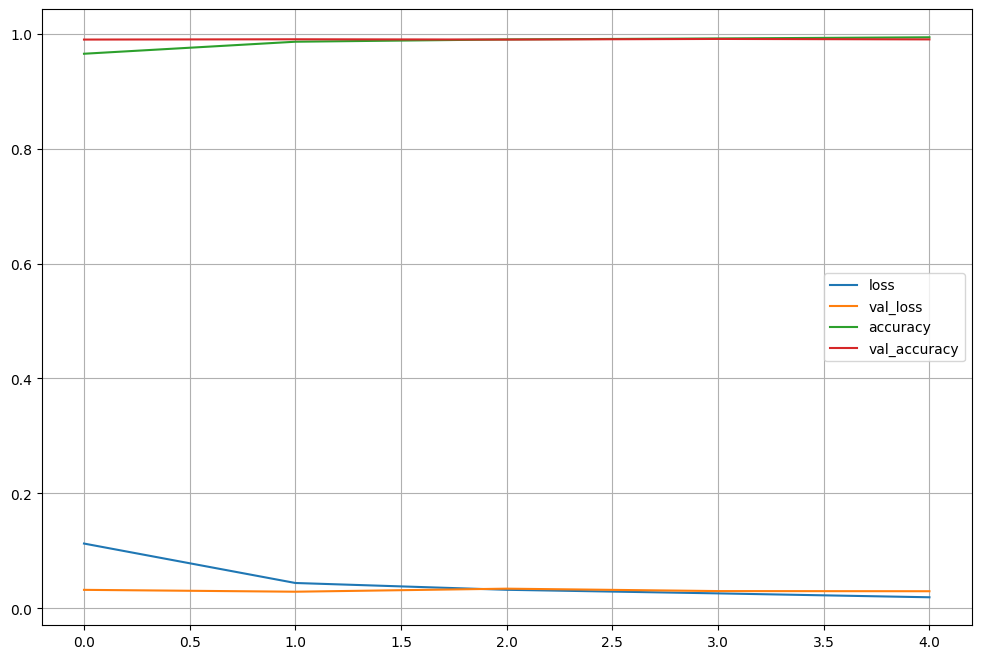

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9899
Test loss :  0.02985868602991104
Test accuracy :  0.9898999929428101


In [10]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [11]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

101

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2976,
 2070,
 1014,
 940,
 2454,
 2280,
 3808,
 9024,
 1878,
 5654,
 6560,
 726,
 1292,
 62,
 2462,
 1232]

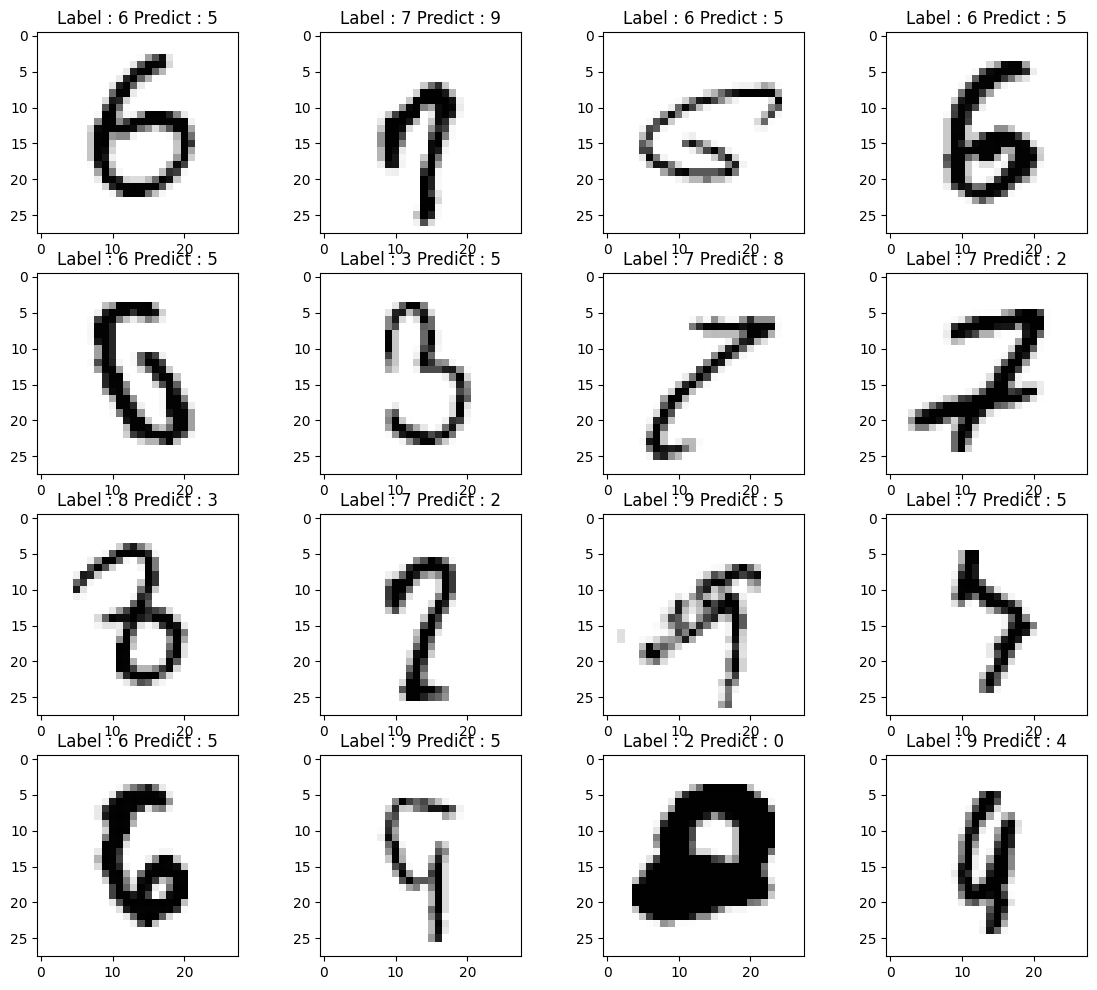

In [13]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))

plt.show()

In [15]:
model.save('MNIST_CNN_model.keraa')

In [16]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/ 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [18]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/ 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [19]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [20]:
import time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3982 - accuracy: 0.8546 - val_loss: 0.3085 - val_accuracy: 0.8864
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2746 - accuracy: 0.8979 - val_loss: 0.2645 - val_accuracy: 0.8998
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2328 - accuracy: 0.9129 - val_loss: 0.2440 - val_accuracy: 0.9083
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2016 - accuracy: 0.9243 - val_loss: 0.2406 - val_accuracy: 0.9133
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1750 - accuracy: 0.9347 - val_loss: 0.2343 - val_accuracy: 0.9163
fit time :  83.0951681137085


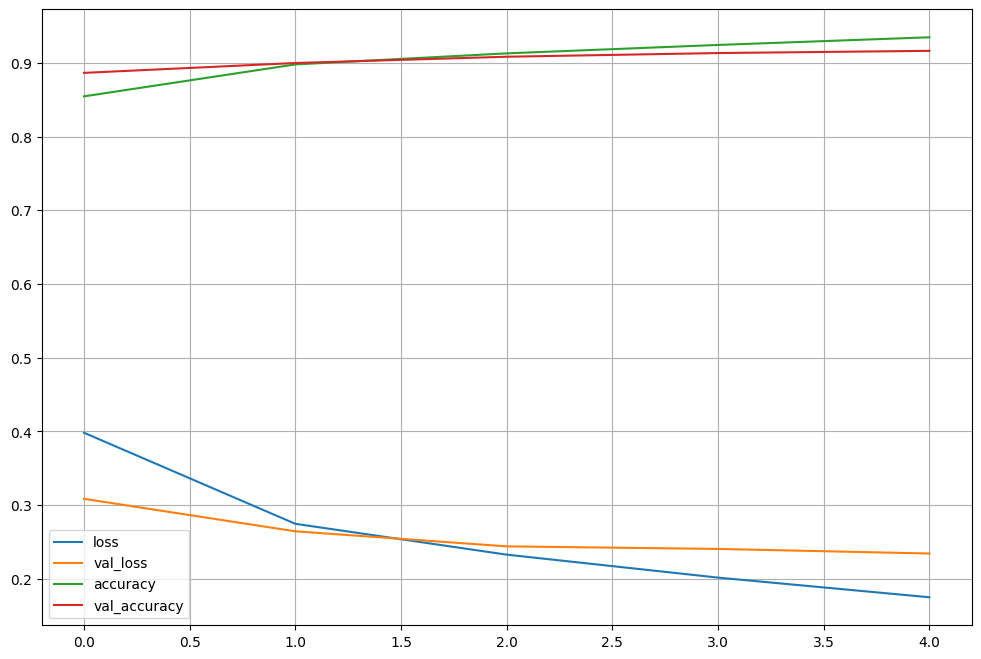

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [22]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9163
Test loss :  0.2343476563692093
Test accuracy :  0.9162999987602234


In [23]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [24]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

837

In [25]:
samples = random.choices(population=wrong_result, k=16)
samples

[9348,
 396,
 4965,
 1980,
 9133,
 5032,
 1055,
 5307,
 948,
 3606,
 713,
 6565,
 1469,
 713,
 4100,
 8952]

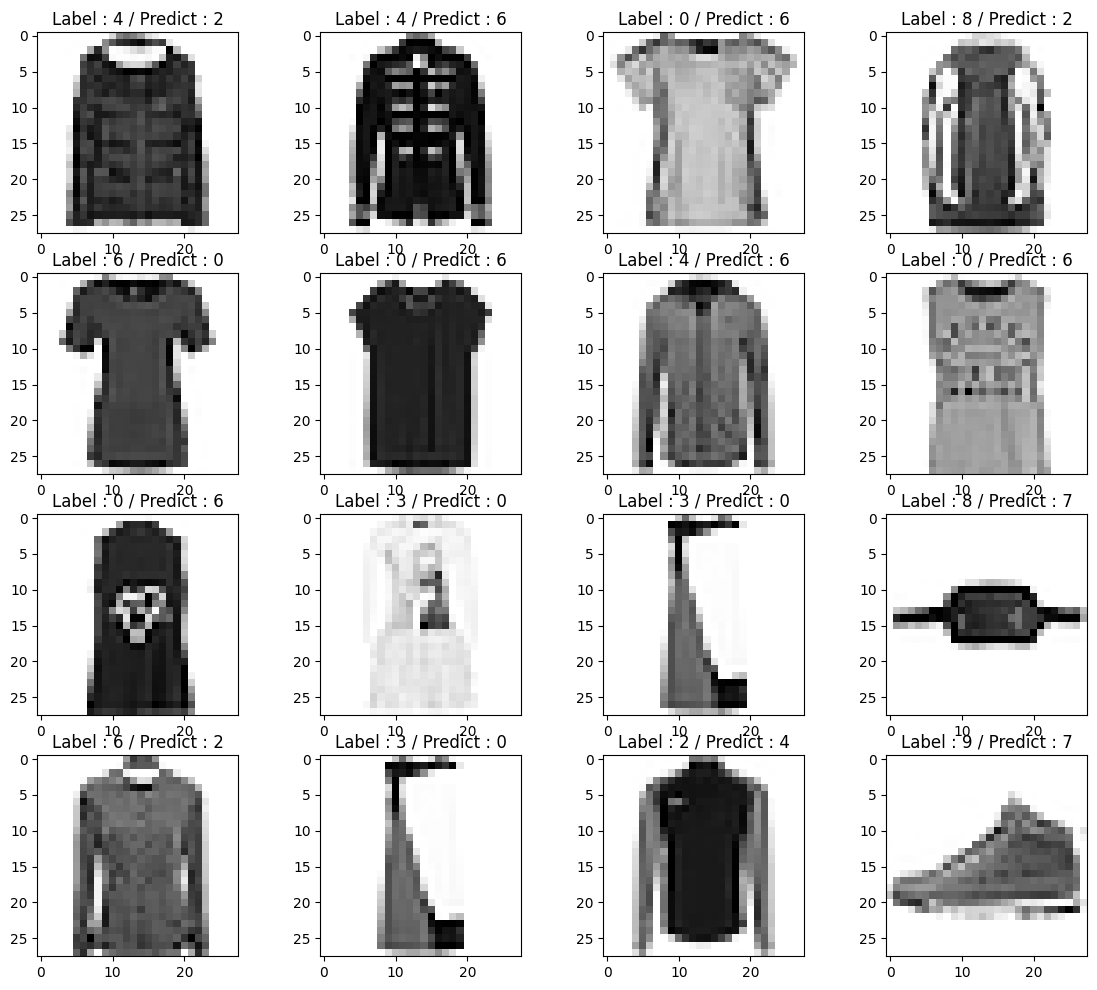

In [26]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))

plt.show()